In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

import functions

In [2]:
mockito = functions.process_project_data('mockito',exploratory=True)
wildfly = functions.process_project_data('wildfly',exploratory=True)

### Exploring outliers :

In [4]:
mockito = functions.limit_data_dict(dic=mockito)

initial = 9764
WMC : outlier of 1428, 75% = 2 , 7879 ,2
RFC : outlier of 113,  75% = 0 , 7524 ,1
LCOM: outlier of 100,  75% = 0 , 7496 ,1
NOC : outlier of 53,   75% = 0 , 7371 ,1
CBO : outlier of 6,    75% = 0 , 7206 ,1
DIT : outlier of 5,    75% = 0 , 7194 ,2 becase the data decreased by 300 which was a major change
CYCLOMATIC : outlier of 2, 75% = 1 ,  ,2

In [6]:
mockito = functions.limit_data_eachcol_dict(col="wmc",dic=mockito,value=2)
mockito = functions.limit_data_eachcol_dict(col="rfc",dic=mockito,value=1)
mockito = functions.limit_data_eachcol_dict(col="lcom",dic=mockito,value=1)
mockito = functions.limit_data_eachcol_dict(col="noc",dic=mockito,value=1)
mockito = functions.limit_data_eachcol_dict(col="cbo",dic=mockito,value=1)
mockito = functions.limit_data_eachcol_dict(col="dit",dic=mockito,value=2)


v25


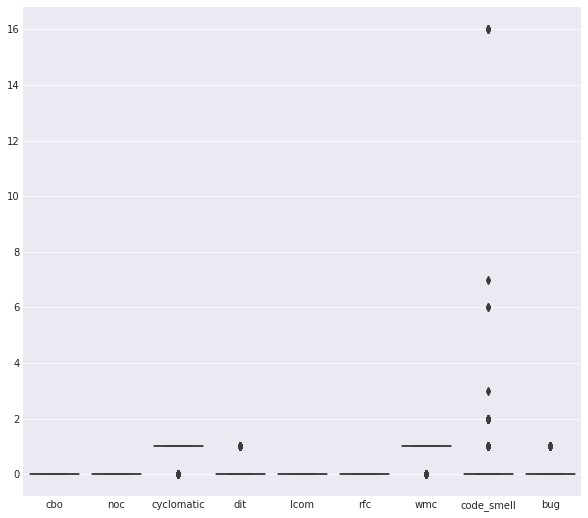

v17


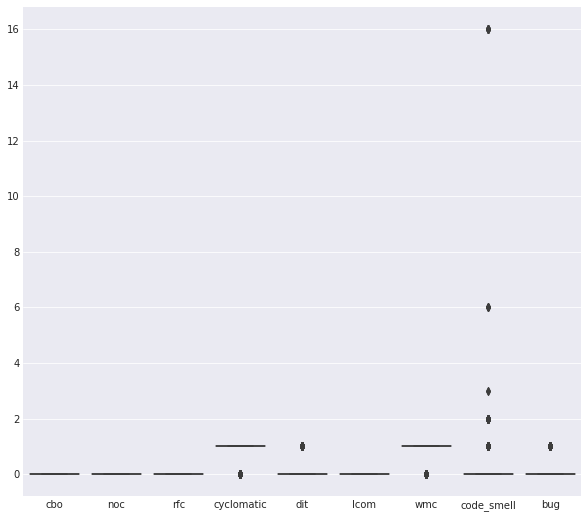

v21


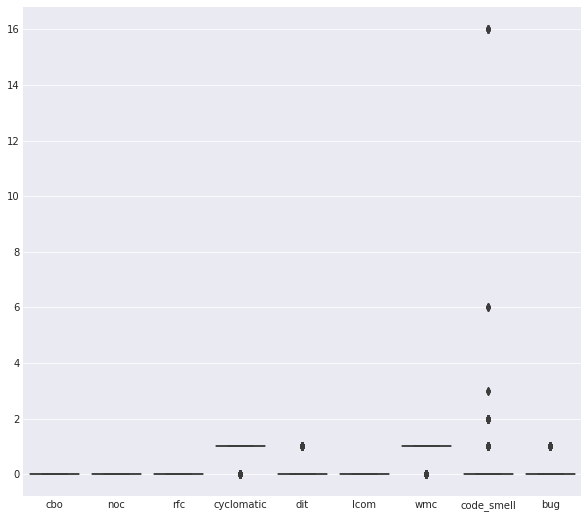

In [7]:
for ver in mockito:
    print(ver)
    
    f,ax = plt.subplots(figsize=(10,9))
    #ax.set_ylim([0,60])
    df = mockito[ver]
    
    sns.boxplot(data=df)
    plt.show()

### Limiting data and reducing outliers

In [8]:
mockito = functions.limit_data_dict(mockito)
wildfly = functions.limit_data_dict(wildfly)

v12


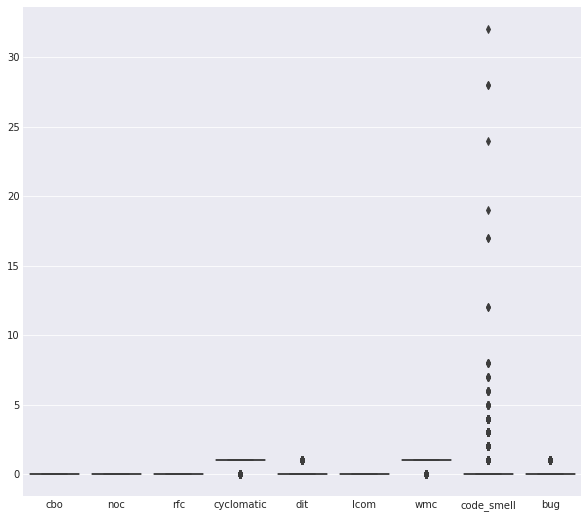

v16


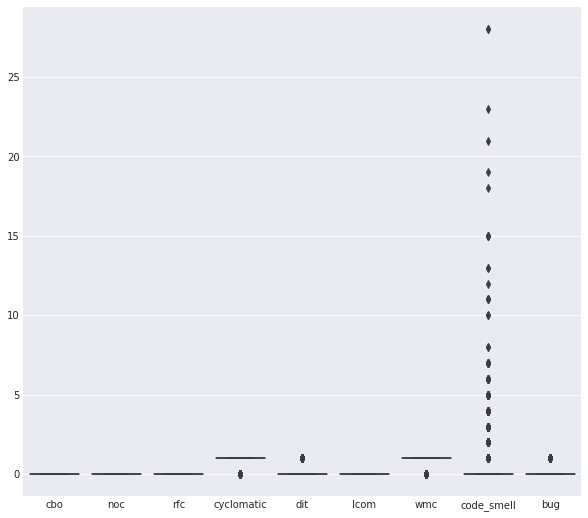

v8


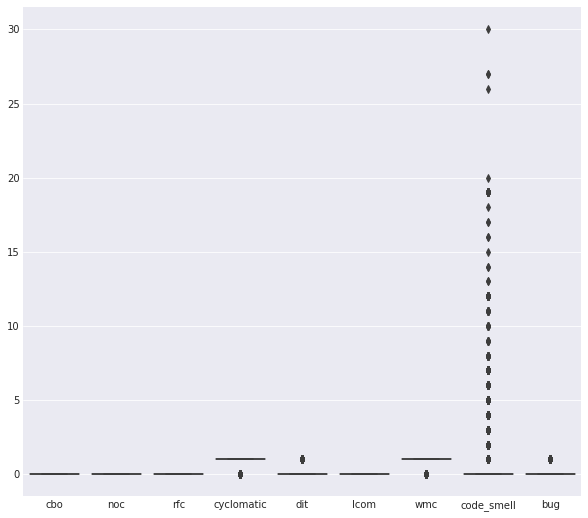

In [9]:
for ver in wildfly:
    print(ver)
    
    f,ax = plt.subplots(figsize=(10,9))
    #ax.set_ylim([0,60])
    df = wildfly[ver]
    
    sns.boxplot(data=df)
    plt.show()

## Plotting Heat Maps:

---
### Observations:
<br>
Following are the high correlations that we observe:

- **Mockito:**
    - __*>45% :*__
        - CBO vs [RFC,DIT,LCOM]
        - RFC vs [DIT]
- **Wildfly:**
    - __*>50% :*__
        - CBO vs [RFC,DIT,LCOM]
        - RFC vs [DIT]


---
**WILDFLY HEATPLOTS**

---

In [ ]:
functions.plot_heatMaps(df=wildfly)

**MOCKITO HEATPLOTS**

---

In [ ]:
plt.figure(figsize=(10,9))
df = mockito['v25']
corr = df.corr(method="spearman")
sns.heatmap(corr,annot=True)

In [ ]:
functions.plot_heatMaps(df=mockito)

<br>
<font size=4>Based on the variables we see having high correlations, we make regression plots to uncover the kind of correlation pattern they share.</font>
</br>

# CBO VS [RFC , LCOM]

**MOCKITO REGRESSION PLOTS**
- CBO VS RFC
- CBO VS LCOM
---

In [ ]:
x='cyclomatic'
y=['rfc']
functions.plot_regressions(data=mockito,proj_name='mockito',checkVar=x,vsVarList=y,ylim=60)

In [ ]:
x='rfc'
y=['dit']
functions.plot_regressions(data=mockito,proj_name='mockito',checkVar=x,vsVarList=y,ylim=60)

In [ ]:
x='cbo'
y=['rfc','lcom']
functions.plot_regressions(data=mockito,proj_name='mockito',checkVar=x,vsVarList=y,ylim=60)

**WILDFLY REGRESSION PLOTS**
- CBO VS RFC
- CBO VS LCOM
---

In [ ]:
x = 'cbo'
y = ['rfc','lcom']
functions.plot_regressions(data=wildfly,proj_name='wildfly',checkVar=x,vsVarList=y)

# CBO VS DIT

**MOCKITO**

In [ ]:
x = 'cbo'
y = ['dit']
functions.plot_regressions(data=mockito,proj_name='mockito',checkVar=x,vsVarList=y,ylim=100)

In [ ]:
for ver in mockito:
    print(ver)
    f,ax = plt.subplots(figsize=(12,2))
    sns.pointplot(data=mockito['v21'],y='cbo',x='dit',color='g')
    plt.show()

**WILDFLY**

In [ ]:
x = 'cbo'
y = ['dit']
functions.plot_regressions(data=wildfly,proj_name='wildfly',checkVar=x,vsVarList=y,ylim=100)

In [ ]:
for ver in wildfly:
    print(ver)
    f,ax = plt.subplots(figsize=(12,2))
    sns.pointplot(data=wildfly[ver],y='cbo',x='dit',color='g',errwidth=False)
    plt.show()

# RFC VS DIT 

**MOCKITO**

In [ ]:
x = 'rfc'
y = ['dit']
functions.plot_regressions(data=mockito,proj_name='mockito',checkVar=x,vsVarList=y,ylim=200)


**WILDFLY**

In [ ]:
x = 'rfc'
y = ['dit']
functions.plot_regressions(data=wildfly,proj_name='wildfly',checkVar=x,vsVarList=y,ylim=200)

In [ ]:
df = mockito['v25']

In [ ]:
def plot_metric_bug(df,kind='bar'):
    for col in df.columns:
        df.groupby(col)['bug'].count().plot(kind='bar')
        plt.show()

In [ ]:
plot_metric_bug(df)

In [ ]:
df.groupby('cbo')['bug'].count().plot(kind='bar')

In [ ]:
df.groupby('dit')['bug'].count().plot(kind='bar')